In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

Load the dataset

In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

dataset_path = "C:/Users/mdnos/Documents/Project Station/Rich Detection/data/Rice_Image_Dataset"

# train_ds = image_dataset_from_directory(
#     dataset_path,
#     image_size=(224, 224),     # adjust to what your model expects
#     batch_size=32,
#     label_mode='categorical',  # or 'int' if you're using sparse labels
#     shuffle=True
# )


In [3]:
train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'  # <-- for one-hot encoding
)


Found 75000 files belonging to 5 classes.
Using 60000 files for training.


In [5]:
# Load validation dataset (20%)
val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


In [6]:
model = models.Sequential()

In [7]:
for images, labels in train_ds.take(1):
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)

Images shape: (32, 224, 224, 3)
Labels shape: (32, 5)


In [12]:
class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

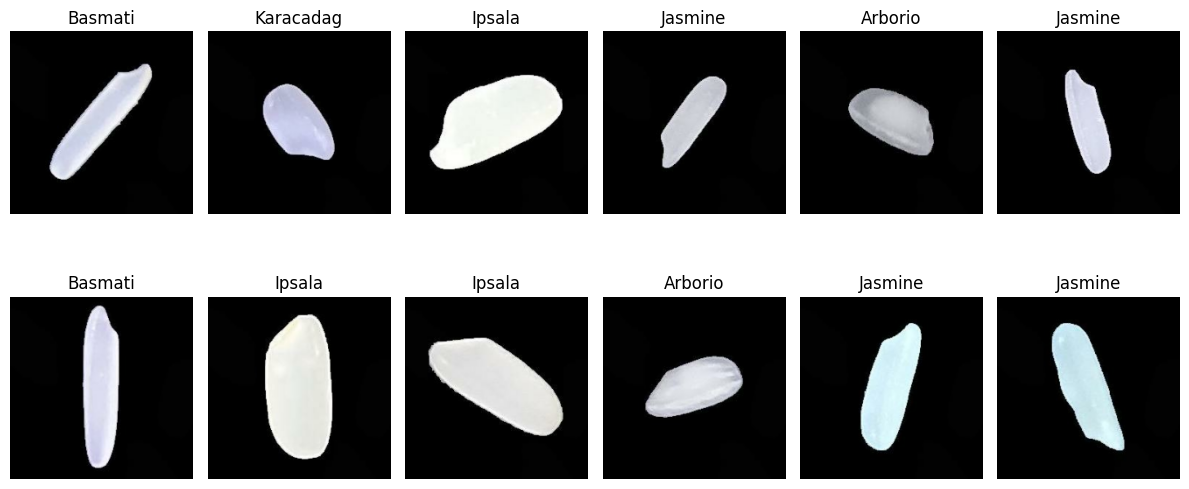

In [13]:
# Grab one batch
for images, labels in train_ds.take(1):
    plt.figure(figsize=(12, 6))
    for i in range(12):
        plt.subplot(2, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # If labels are integers
        # label_index = labels[i].numpy()
        # plt.title(class_names[label_index])

        # If labels are one-hot vectors, use this instead:
        label_index = np.argmax(labels[i].numpy())
        plt.title(class_names[label_index])

        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))  # Input image size
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())  # Flattens to 1D
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(5, activation='softmax'))  # num_classes = total labels

C:\Users\mdnos\Documents\Project Station\mp_tf_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 111, 111, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 54, 54, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 26, 26, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,501 (42.61 MB)

 Trainable params: 11,170,053 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # ✅ not sparse!
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=1  # You can change this to more or fewer epochs
)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4136s 2s/step - accuracy: 0.8223 - loss: 0.9001 - val_accuracy: 0.8895 - val_loss: 0.3420


In [19]:
# Evaluate on val_ds (as test)
test_loss, test_accuracy = model.evaluate(val_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 122s 260ms/step - accuracy: 0.8928 - loss: 0.3280
Test Accuracy: 0.8895


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


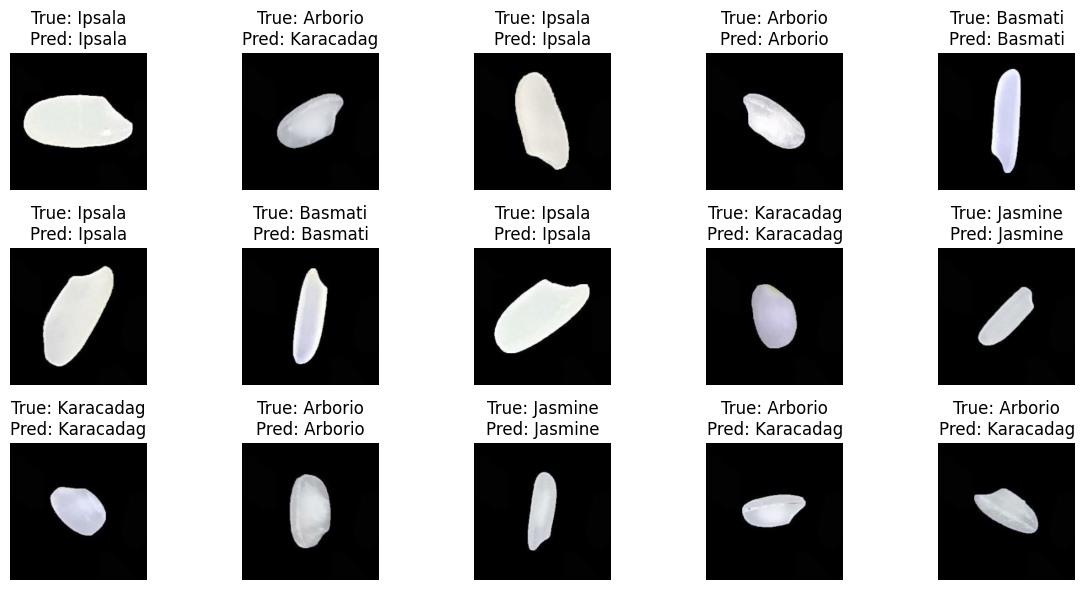

In [20]:
# Get a batch from validation dataset
for test_images, test_labels in val_ds.take(1):  # Or use test_ds if you have a separate test set
    sample_images = test_images[:15]
    
    # If labels are one-hot encoded, convert them
    if len(test_labels.shape) == 2:
        sample_labels = np.argmax(test_labels[:15].numpy(), axis=1)
    else:
        sample_labels = test_labels[:15].numpy()
    
    # 2. Make predictions
    predictions = np.argmax(model.predict(sample_images), axis=1)

    # 3. Plot results
    plt.figure(figsize=(12, 6))
    for i in range(15):
        plt.subplot(3, 5, i + 1)
        plt.imshow(sample_images[i].numpy().astype("uint8"))
        plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

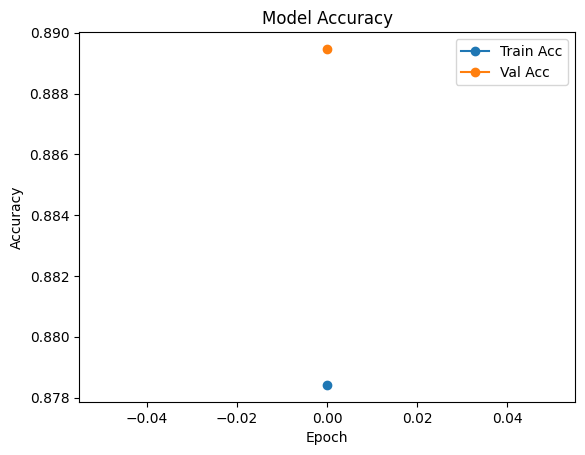

In [22]:



plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


In [24]:
model.save("rice_cnn_model.h5")

In [26]:
loaded_model = tf.keras.models.load_model('rice_cnn_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


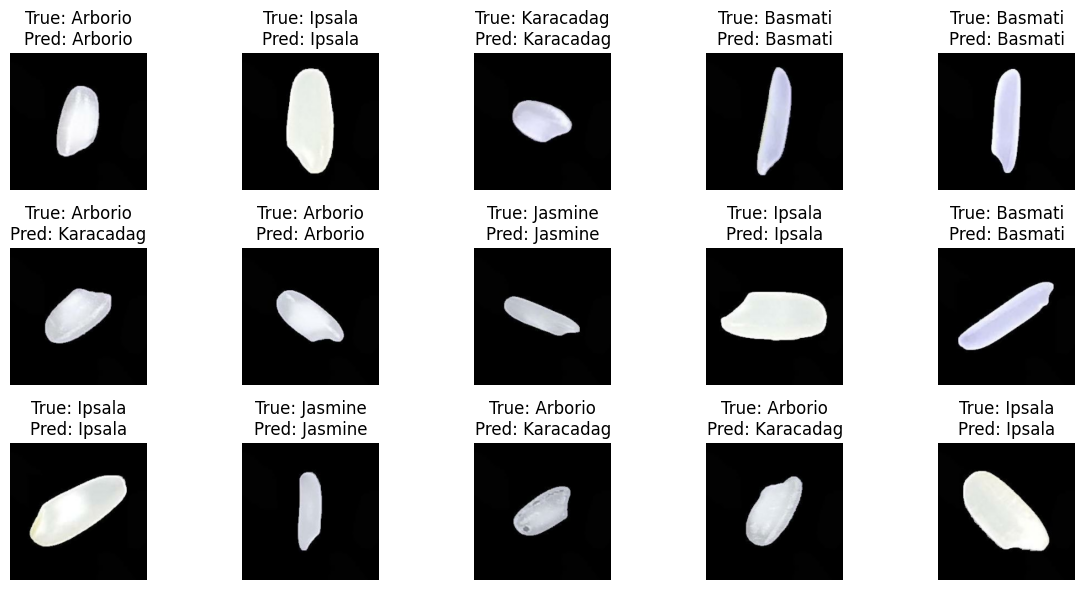

In [29]:
# Get a batch from validation dataset
for test_images, test_labels in val_ds.take(1):  # Or use test_ds if you have a separate test set
    sample_images = test_images[:15]
    
    # If labels are one-hot encoded, convert them
    if len(test_labels.shape) == 2:
        sample_labels = np.argmax(test_labels[:15].numpy(), axis=1)
    else:
        sample_labels = test_labels[:15].numpy()
    
    # 2. Make predictions using the loaded model
    predictions = np.argmax(loaded_model.predict(sample_images), axis=1)

    # 3. Plot results
    plt.figure(figsize=(12, 6))
    for i in range(15):
        plt.subplot(3, 5, i + 1)
        plt.imshow(sample_images[i].numpy().astype("uint8"))
        plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [28]:
# Evaluate loaded model on validation data
loss, accuracy = loaded_model.evaluate(val_ds)
print(f"Loaded Model Accuracy: {accuracy:.4f}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 118s 250ms/step - accuracy: 0.8930 - loss: 0.3268
Loaded Model Accuracy: 0.8895


In [ ]:
# Evaluate loaded model on validation data
loss, accuracy = loaded_model.evaluate(val_ds)
print(f"Loaded Model Accuracy: {accuracy:.4f}")